In [2]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [29]:
data = pd.read_csv("Census Income Project.csv")
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
data.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [6]:
#here we are creating two sperate list for object type and int type features 
data_object = []
data_continous = []
for i in data:
    if data[i].dtypes == object:
        data_object.append(i)
    else:
        data_continous.append(i)
data_object,data_continous

(['Workclass',
  'Education',
  'Marital_status',
  'Occupation',
  'Relationship',
  'Race',
  'Sex',
  'Native_country',
  'Income'],
 ['Age',
  'Fnlwgt',
  'Education_num',
  'Capital_gain',
  'Capital_loss',
  'Hours_per_week'])

In [7]:
print(data.shape,"\n")
print("The Number of rows are : " ,data.shape[0],"\n")
print("The Nymber of columns are :" ,data.shape[-1])

(32560, 15) 

The Number of rows are :  32560 

The Nymber of columns are : 15


In [8]:
#now let's check the unique values in the categorical field
data_object

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

In [9]:
data['Workclass'].unique(),len(data['Workclass'].unique())

(array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
        ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
        ' Never-worked'], dtype=object),
 9)

In [10]:
data['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

we observed that some '?' are present in this feature.

In [11]:
data['Education'].unique(),len(data['Education'].unique())

(array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
        ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
        ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
        ' Preschool', ' 12th'], dtype=object),
 16)

There are total 16 unique values are present in the Education Feature.

In [12]:
data['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

HS-grad has the most number of indivisuals.

In [13]:
data['Marital_status'].unique(),len(data['Marital_status'].unique())

(array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
        ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
       dtype=object),
 7)

There are total 7 unique values are present in the Marital status Feature.

In [14]:
data['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [15]:
data['Occupation'].unique(),len(data['Occupation'].unique())

(array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
        ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
        ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
        ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
        ' Priv-house-serv'], dtype=object),
 15)

There are total 15 unique values are present in the Occupation Feature including '?'.

In [16]:
data['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

we observed that some '?' are present in this feature.

In [17]:
data['Relationship'].unique(),len(data['Relationship'].unique())

(array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
        ' Other-relative'], dtype=object),
 6)

There are total 6 unique values are present in the Realationship Feature.

In [18]:
data['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

In [19]:
data['Race'].unique(),len(data['Race'].unique())

(array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
        ' Other'], dtype=object),
 5)

There are total 5 unique values are present in the Race Feature.

In [20]:
data['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In [21]:
data['Sex'].unique(),len(data['Sex'].unique())

(array([' Male', ' Female'], dtype=object), 2)

There are total 2 unique values are present in the Sex Feature.

In [22]:
data['Sex'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

In [23]:
data['Native_country'].unique(),len(data['Native_country'].unique())

(array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
        ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
        ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
        ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
        ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
        ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
        ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
        ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
        ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object),
 42)

There are total 42 unique values are present in the Native Country Feature including '?'

In [24]:
data['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [25]:
data['Income'].unique(),len(data['Income'].unique())

(array([' <=50K', ' >50K'], dtype=object), 2)

There are total 2 unique values are present in the Income Feature.

In [26]:
data['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

Here we can see that there is huge difference between the two values means this feature is unbalanced.

In [31]:
#We'll be removing all the '?' with nan in all the features where '?' is present.
data = data.replace('?',np.nan)

In [32]:
data.head(20)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [33]:
data.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


observations:

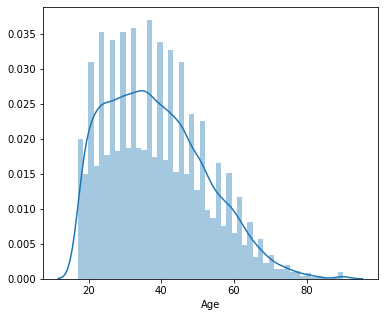

In [34]:
#using distibution plot to plot these continous features
plt.figure(figsize = [6,5])
plt.xlabel("Age")
sns.distplot(data[["Age"]],kde = True)
plt.show()

The age features is right skewed.

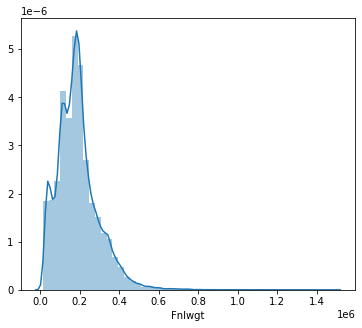

In [35]:
#using distibution plot to plot these continous features
plt.figure(figsize = [6,5])
plt.xlabel("Fnlwgt")
sns.distplot(data[["Fnlwgt"]],kde = True)
plt.show()

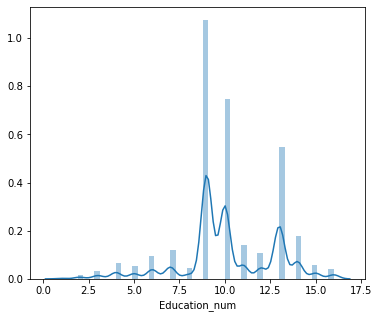

In [36]:
#using distibution plot to plot these continous features
plt.figure(figsize = [6,5])
plt.xlabel("Education_num")
sns.distplot(data[["Education_num"]],kde = True)
plt.show()

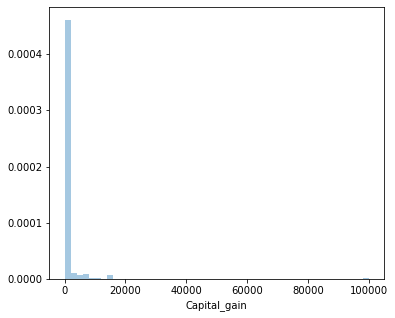

In [37]:
plt.figure(figsize = [6,5])
plt.xlabel("Capital_gain")
sns.distplot(data[["Capital_gain"]],kde = True)
plt.show()

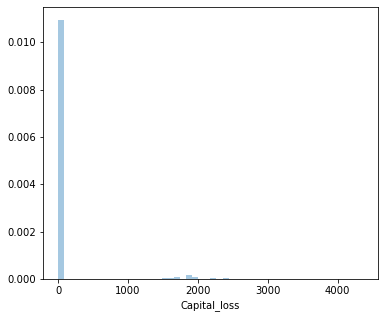

In [38]:
plt.figure(figsize = [6,5])
plt.xlabel("Capital_loss")
sns.distplot(data[["Capital_loss"]],kde = True)
plt.show()

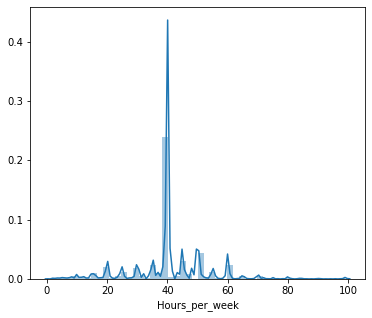

In [39]:
plt.figure(figsize = [6,5])
plt.xlabel("Hours_per_week")
sns.distplot(data[["Hours_per_week"]],kde = True)
plt.show()

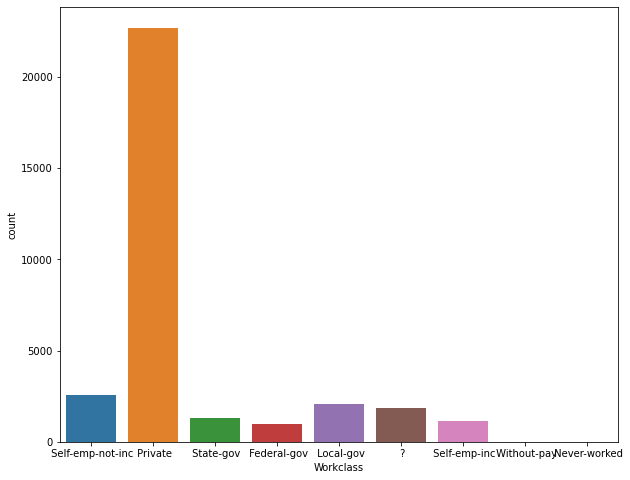

In [41]:
#using count plot for categorical features
plt.figure(figsize = [10,8])
sns.countplot(data['Workclass'])


In [42]:
data_object

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

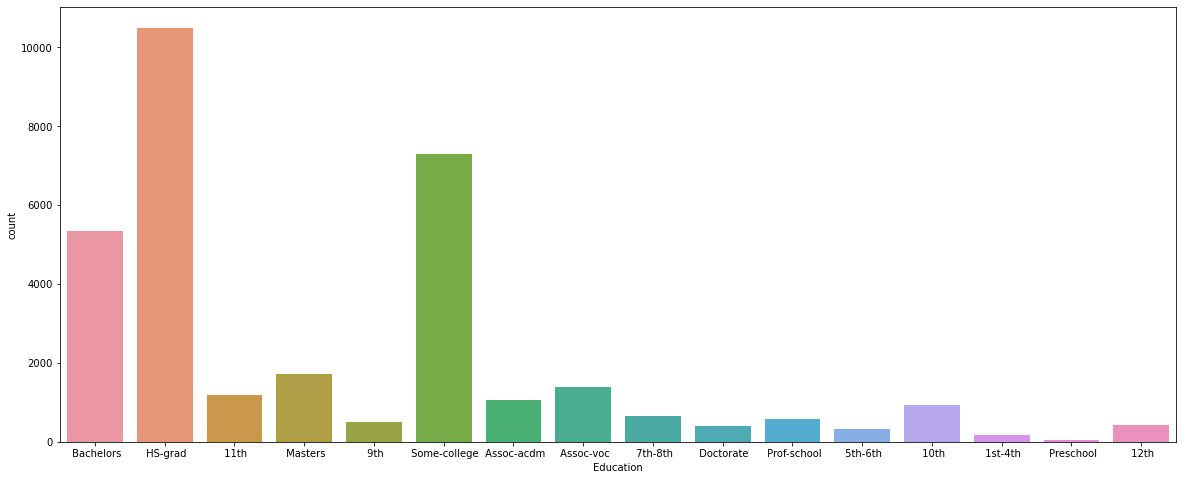

In [45]:
#using count plot for categorical features
plt.figure(figsize = [20,8])
sns.countplot(data['Education'])

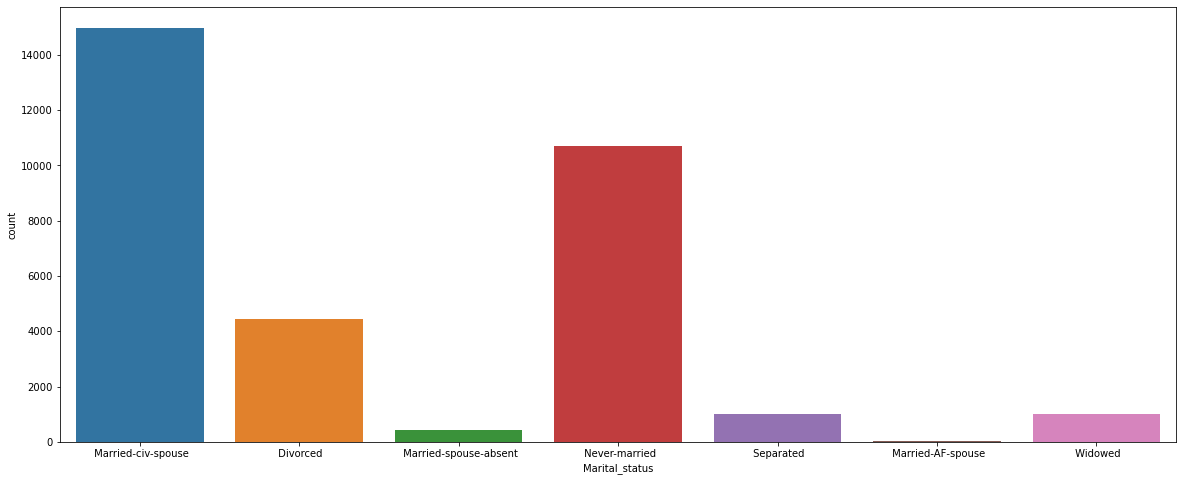

In [46]:
#using count plot for categorical features
plt.figure(figsize = [20,8])
sns.countplot(data['Marital_status'])

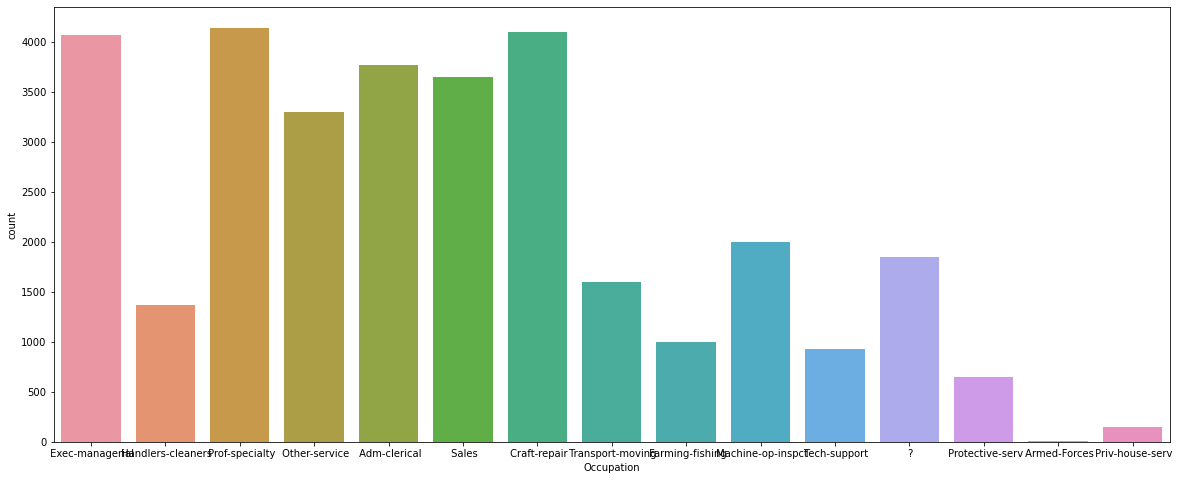

In [47]:
#using count plot for categorical features
plt.figure(figsize = [20,8])
sns.countplot(data['Occupation'])